In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


#### Simple Line plot for daily opening price

c:\program files\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


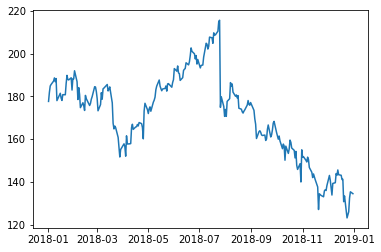

In [4]:
plt.plot(fb.index, fb.open)

#### Scatter plot of high and low prices 

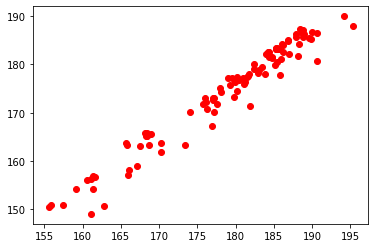

In [12]:
plt.plot('high', 'low', 'ro', data=fb.head(100)) 
#r is red, o is dots. colors = {blue:b, black:k, red:r, green:g, magenta:m, cyan:c}
#markers = {solid line: -, dashed line: --, point: ., solid line with points: -., dotted line: :, dot dash line: -.}

#### Histogram

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <a list of 10 Patch objects>)

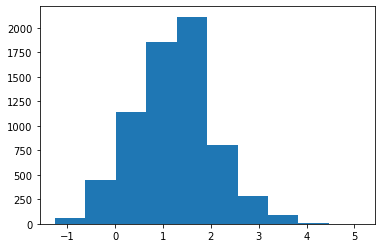

In [5]:
quakes = pd.read_csv('data/earthquakes.csv')
plt.hist(quakes.loc[(quakes.magType=='ml'), 'mag'])

#### Plot components

In [25]:
#creating figure object
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

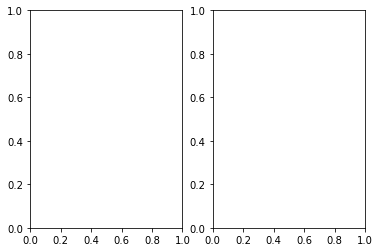

In [26]:
#create multiple plots in same fig
#plt.subplots(nrow, ncol) returns figure and axes objects
fig, axes = plt.subplots(1, 2)

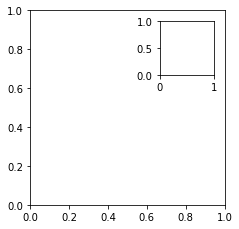

In [27]:
#Alternative for subplots() is add_axes([left, bottom, width, height])
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

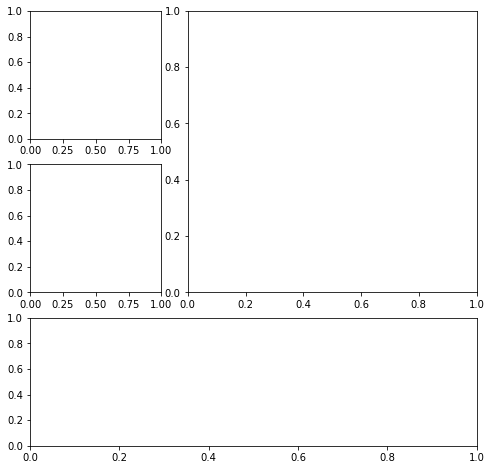

In [29]:
#Subplots of different sizes
#add_gridspec()
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3) #matrix of 3x3 [[0,1,2],[0,1,2]]
topLeft = fig.add_subplot(gs[0, 0]) #row 0 col 0
midLeft = fig.add_subplot(gs[1, 0]) #row 1 col 0
topRight = fig.add_subplot(gs[:2, 1:]) # row 0,1 col 1,2 
bottom = fig.add_subplot(gs[2, :]) #row 2 all columns

#use gs similar to python list slicing to select the slot for subplot

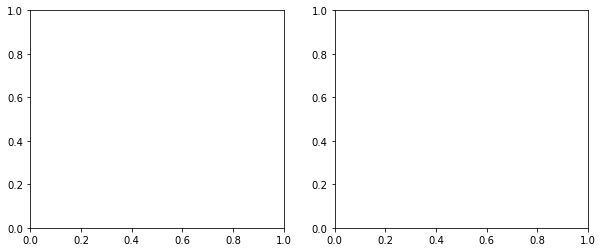

In [30]:
#figsize argument can be passed to plot and subplots to change the figsize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

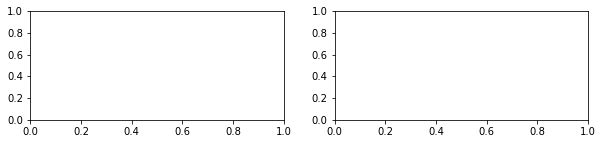

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 2))

### Plotting `series` and `Data Frames`

plot() can be directly used on series and dataframe of pandas
paramets:
kind, x, y, ax, subplots-(Bool), layout-((row, col)), figsize-((width, height)), title, legend(Bool), label, style, color
logx/logy/loglog (Bool - For log scales), xticks/yticks, xlim/ylim, sharex/sharey, fontsize, grid(Bool)

#### Time based plotting

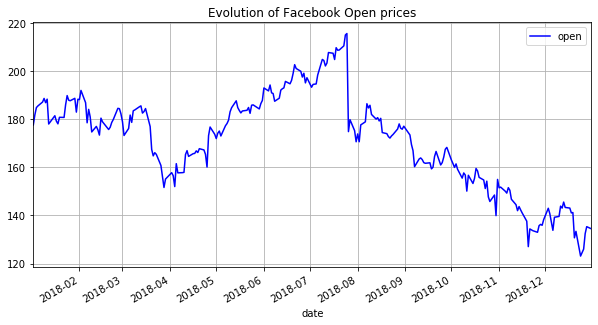

In [7]:
fb.open.plot(kind='line', figsize=(10, 5), style='b-', title='Evolution of Facebook Open prices', grid=True, legend=True)

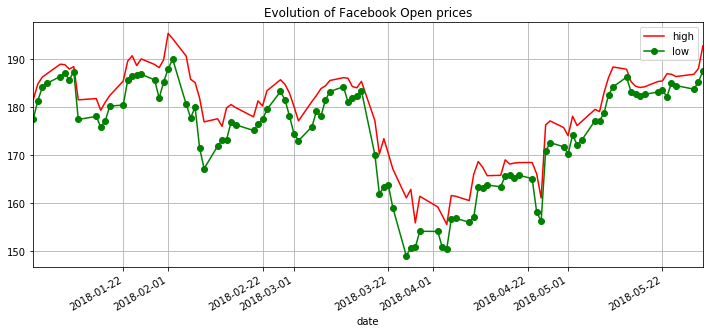

In [23]:
#Multiple variables, Same plot
fb[['high', 'low']]['2018-01':'2018-05'].plot(kind='line', figsize=(12, 5), style=['r-', 'go-'], sharey=True,
                         title='Evolution of Facebook Open prices', grid=True, legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB8BD219C8>,
      dtype=object)

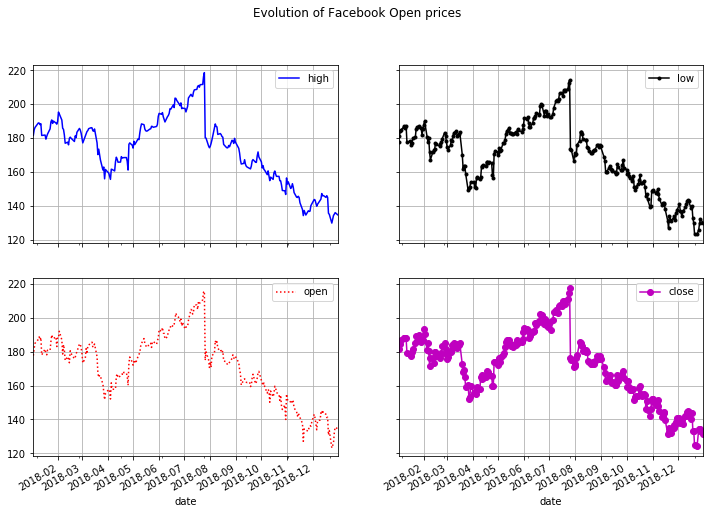

In [24]:
#Multiple variables, subplots
fb[['high', 'low', 'open', 'close']].plot(kind='line', figsize=(12, 8), subplots=True, layout=(2,2), 
                                          style=['b-', 'k.-', 'r:', 'mo-'], sharey=True,
                         title='Evolution of Facebook Open prices', grid=True, legend=True)

##### Scatter Plot

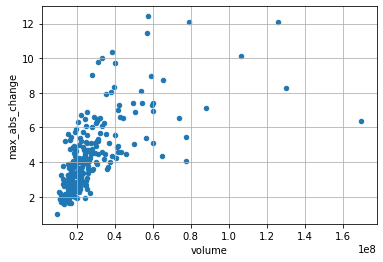

In [30]:
fb.assign(max_abs_change = fb.high-fb.low).plot(kind='scatter', x='volume', y='max_abs_change', grid=True)

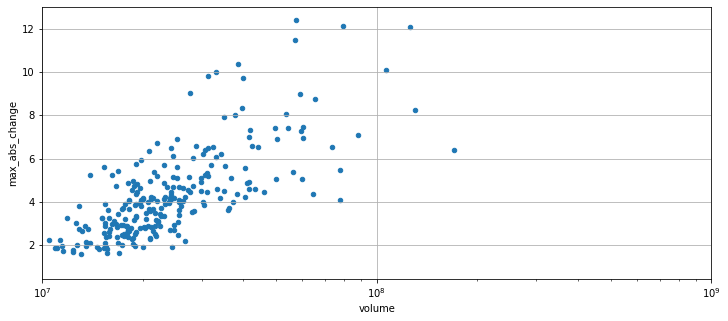

In [52]:
#Taking a log of volume for better visualization
fb.assign(max_abs_change = fb.high-fb.low).plot(kind='scatter', x='volume', y='max_abs_change', figsize=(12,5),
                                                logx=True, xlim=(10e6,10e8), grid=True)

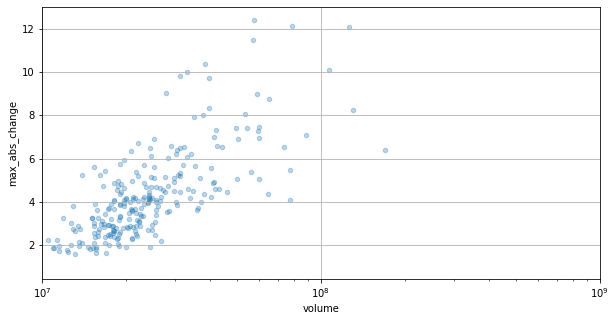

In [56]:
#See the overlapping
#Taking a log of volume for better visualization
fb.assign(max_abs_change = fb.high-fb.low).plot(kind='scatter', x='volume', y='max_abs_change', figsize=(10,5),
                                                logx=True, xlim=(10e6,10e8), alpha=0.30, grid=True)

#### Histograms

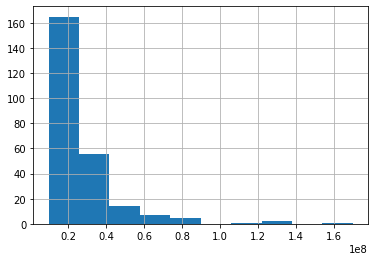

In [57]:
fb.volume.hist()

Text(0.5, 1.0, 'Facebook Volume Traded')

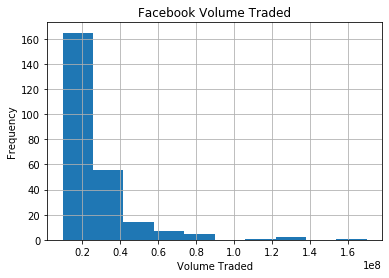

In [69]:
fb.volume.plot(kind='hist', grid=True)
plt.xlabel('Volume Traded')
plt.ylabel('Frequency')
plt.title('Facebook Volume Traded')


##### Multiple Histograms in one fig

Text(0.5, 0, 'Magnitude')

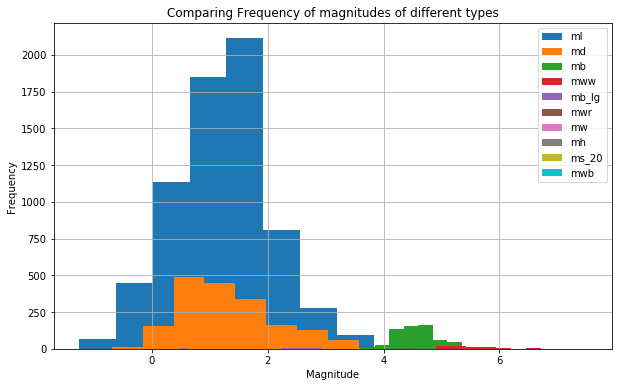

In [83]:
fig, axes = plt.subplots(figsize=(10,6))
for magtype in quakes.magType.unique():
    eq_mag = quakes.query(f'magType == "{magtype}"').mag
    if not eq_mag.empty:
        eq_mag.plot(kind='hist', ax=axes,
                  label=magtype, legend=True,
                  grid=True,
                  title='Comparing Frequency of magnitudes of different types')
plt.xlabel('Magnitude')

#### Barcharts

Text(0.5, 0, 'Month')

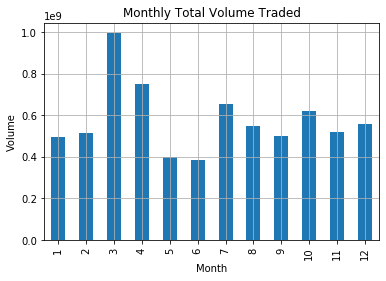

In [94]:
fb.assign(month = lambda x: x.index.month).groupby('month').sum().volume.plot.bar(title='Monthly Total Volume Traded', grid=True)
plt.ylabel('Volume')
plt.xlabel('Month')

#### Horizontal Bar charts

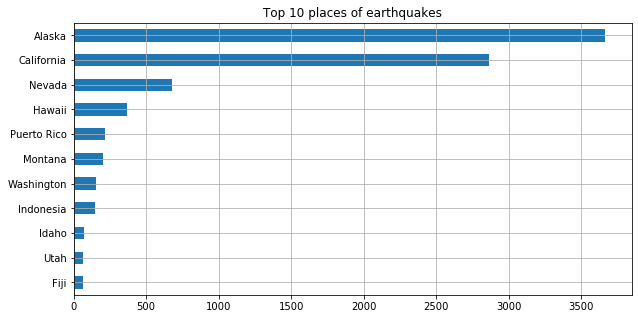

In [106]:
quakes.parsed_place.value_counts().iloc[10::-1].plot.barh(figsize=(10, 5),title='Top 10 places of earthquakes', grid=True)

Text(0.5, 0, 'Number of Tsunamis')

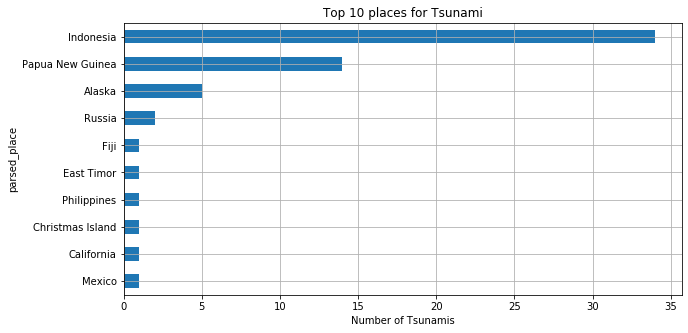

In [114]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10::].plot.barh(figsize=(10,5), 
                                                                                 title='Top 10 places for Tsunami',
                                                                                grid=True)
plt.xlabel('Number of Tsunamis')

#### Top 4 places for earthquakes along with magnitude type with mutiple bars 